In [2]:
import numpy as np
class Perception(object):
    '''
    Created on May 14th, 2017
    Perception: A very simple model for binary classification
    @author: Qi Gong
    '''
    def __init__(self, eta = 0.01, n_iter = 10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        '''
        X : matrix, shape = [n_samples, n_features]. Traning data
        y : vector. label
        '''
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''
        Calculate net_input
        input: X. X is training data and a matrix.
        '''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        '''
        Predict the label by input X
        input : X. X is a matrix.
        '''
        return np.where(self.net_input(X) > 0.0, 1, -1)

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


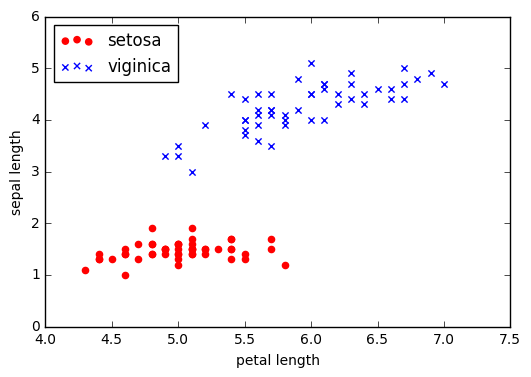

In [4]:
import matplotlib.pyplot as plt

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'viginica')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc = 'upper left')
plt.show()

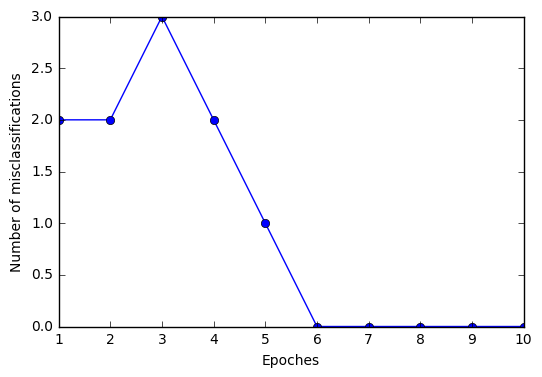

In [5]:
ppn = Perception(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of misclassifications')
plt.show()

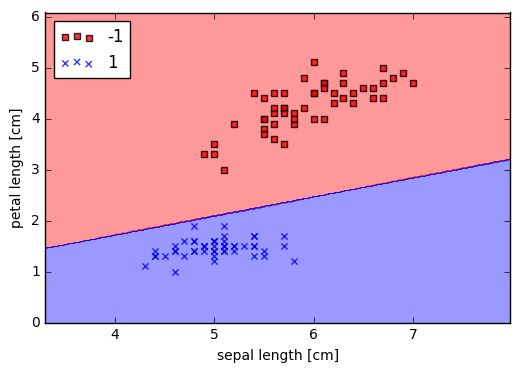

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    '''
    visualize the decision boundaries for 2D datasheet
    '''
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], alpha = 0.8, c = cmap(idx),
                   marker = markers[idx], label = cl)
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()
    

# Implementing an Adaptive Linear Neuron in Python

In [21]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
  
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            error = y - output
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            cost = (error**2).sum()/2.0
            self.errors_.append(cost)
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) > 0.0, 1, -1)
            

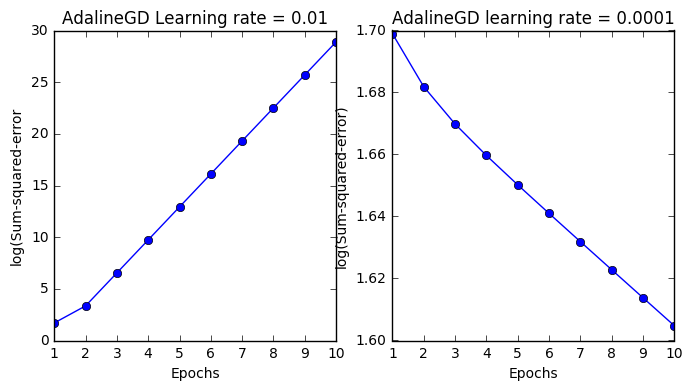

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.errors_) + 1), np.log10(ada1.errors_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error')
ax[0].set_title('AdalineGD Learning rate = 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.errors_) + 1), np.log10(ada2.errors_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('AdalineGD learning rate = 0.0001')
plt.show()

# Standardize the data

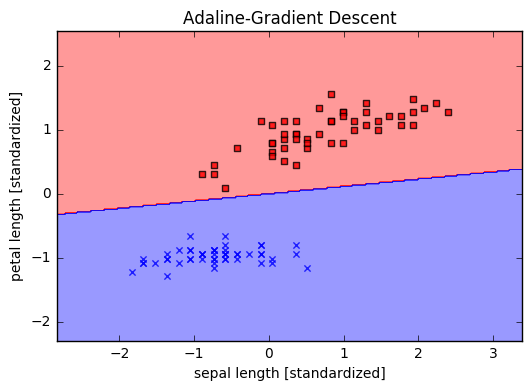

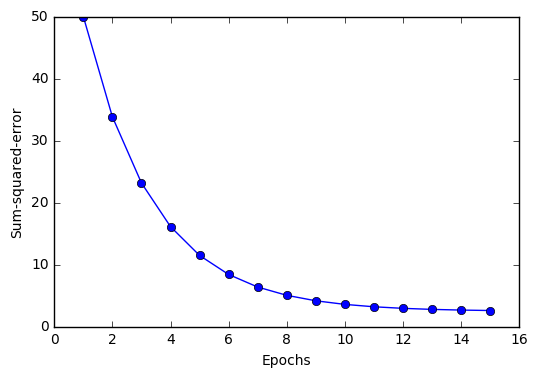

In [25]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline-Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()

plt.plot(range(1, len(ada.errors_) + 1), ada.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()


# Adaptive linear neuron Stochastic Gradient Descent

In [41]:
from numpy.random import seed
class AdalineSGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
  
    def fit(self, X, y):
        self.__initialize_weights(X.shape[1])
        self.errors_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self.__shuffle(X, y)
            
            cost = []
            for xi, target in zip(X, y):
                cost.append(self.__update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.errors_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self.__update_weights(xi, target)
        else:
            self.__update_weights(X, y)
        return self
        
    def __initialize_weights(self, m):
        self.w_ = np.zeros(1+m)
        self.w_initialized = True
        
    def __shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def __update_weights(self, x, y):
        output = self.net_input(x)
        error = y - output
        self.w_[1:] += self.eta * x.dot(error)
        self.w_[0] += self.eta * error
        
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) > 0.0, 1, -1)
            

# Test

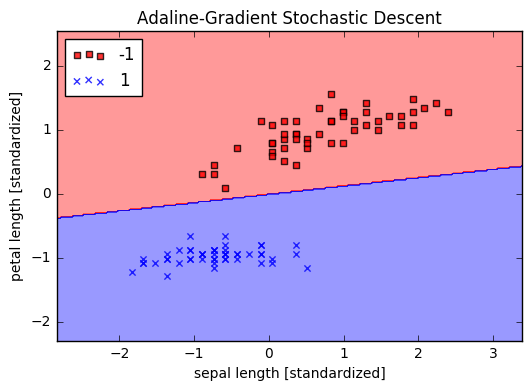

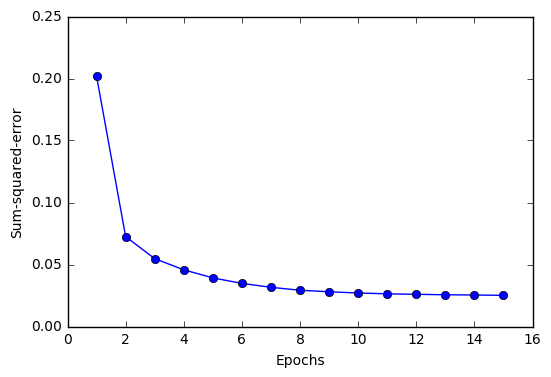

In [43]:
adasgd = AdalineSGD(n_iter = 15, eta = 0.01, random_state = 1)
adasgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=adasgd)
plt.title('Adaline-Gradient Stochastic Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1, len(adasgd.errors_) + 1), adasgd.errors_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()